In [1]:
import cv2
import dlib

import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 


print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


# 1. 얼굴 검출 & 랜드마크 검출

- dlib 이용하여 bounding box 및 landmark 위치 찾기

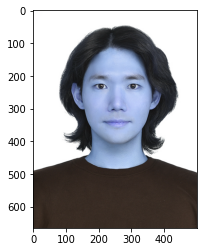

In [2]:
# 준비한 사진

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/O_O.png'
img_bgr = cv2.imread(my_image_path)  

# 출력용 이미지 보관
img_show = img_bgr.copy() 

# 이미지를 출력하기 위해 출력할 이미지를 올리기
plt.imshow(img_bgr) 

plt.show() 

In [3]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [4]:
# bounding box

# rgb로 변환해주기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# image pyramid
# (image, num of image pyramid)
dlib_rects = detector_hog(img_rgb, 1)   

rectangles[[(142, 167) (365, 390)]]


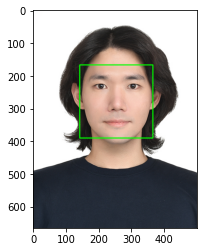

In [5]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 2. 스티커 적용 위치 확인

- landmark 사용
- (코 끝인 33번보다 좋은 위치)

In [6]:
# landmark
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [7]:
# landmark predictor

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
print(len(list_landmarks[0]))


68


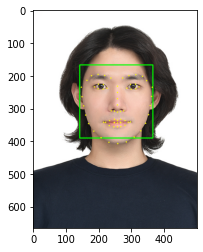

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

# RGB 이미지로 전환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_show_rgb)

# 이미지를 출력
plt.show()
    

# 3. 스티커 적용
- np.where 사용하여 스티커 적용


In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[30]) 
    x = landmark[0][0]-5  
    y = landmark[2][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(257, 289)
(x,y) : (142,180)
(w,h) : (224,224)


In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/catman.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape) 

(224, 224, 3)


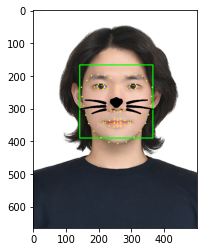

In [11]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

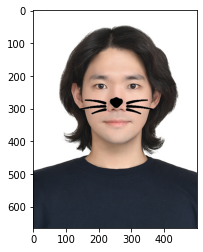

In [12]:
sticker_area = img_bgr[y:y +img_sticker.shape[0], x:x+img_sticker.shape[1]]

img_bgr[y:y +img_sticker.shape[0], x:x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()